## Analyzing Used Car Sales

### Project Summary
Here I aim to get at an overview of the automotive auction industry mainly with the objective to figure out where and which model of Ford F150 can be procured at the most affordable price.

**Note:**
Ford F-150 is the highest selling automobile for decades in the US.

### Objectives:
1. Read in and manipulate data with Pandas.
2. Build summary charts with Matplotlib and Seaborn.
3. Leverage Seaborn's advanced chart types to mine insights from the data and make a decision.

### The Data Set:
The data set consists of used car auction data (United States and Canada).
(Source: Kaggle; https://www.kaggle.com/datasets/tunguz/used-car-auction-prices)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the dataset `car_prices.csv`.
# on_bad_lines='skip' is used to avoid data that has inconsistent rows.
cars = pd.read_csv("../Data/car_prices.csv", on_bad_lines='skip')

In [3]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


# Numeric Variable Relationships

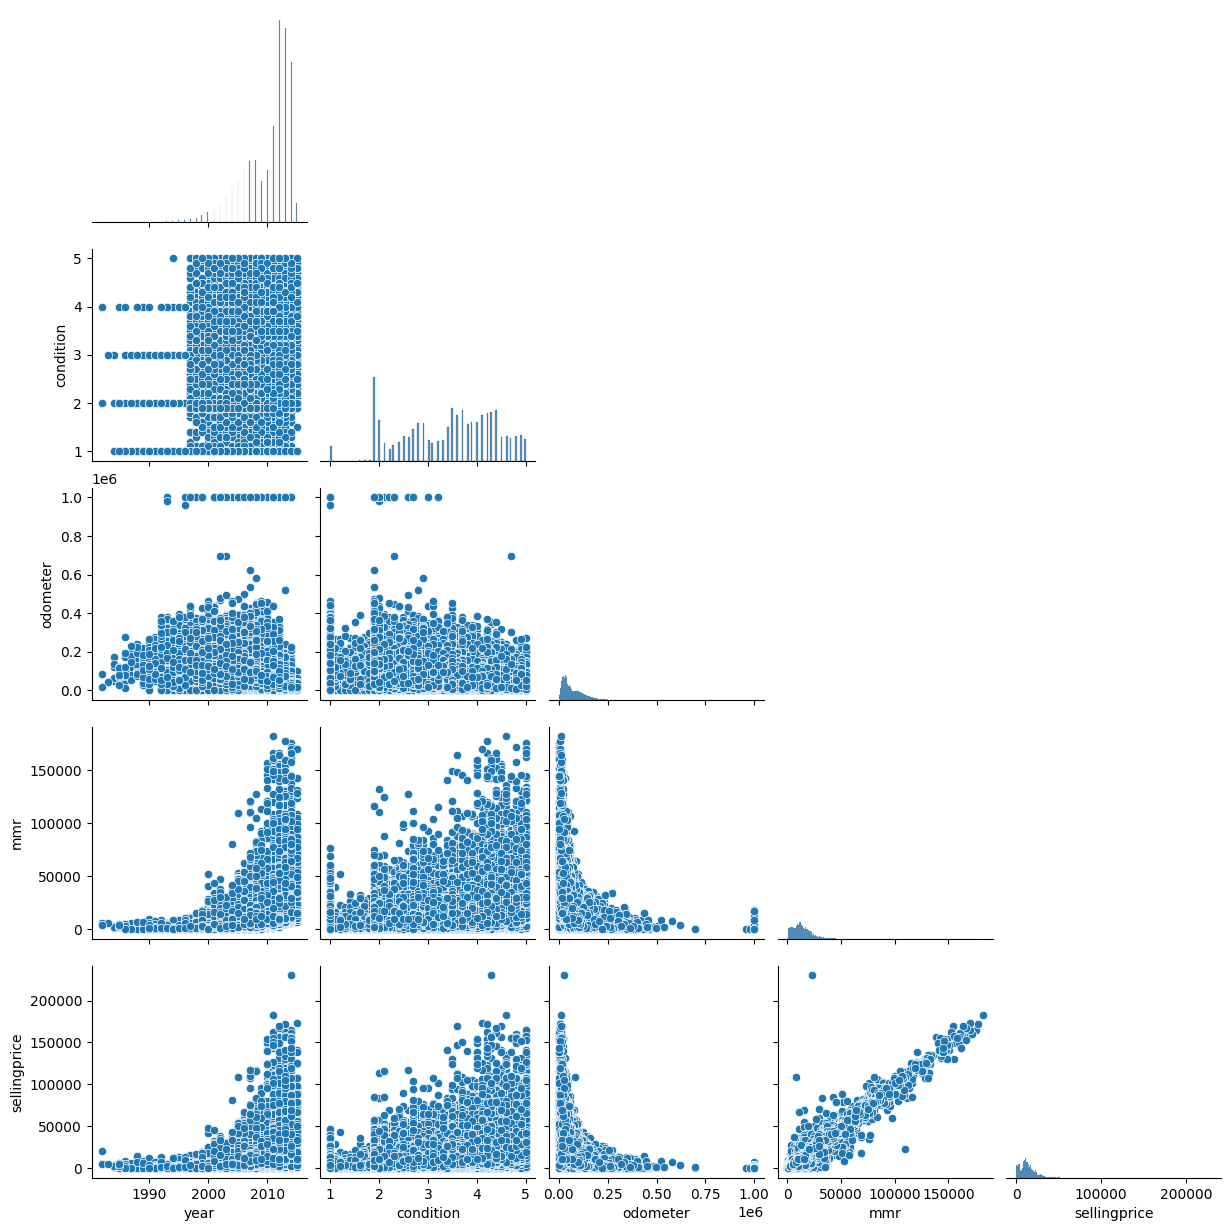

In [6]:
# Pairplot with upper corner turned off.
sns.pairplot(
    cars,
    corner = True
)
plt.show()

* The relationship between `sellingprice` and `mmr` (the recommended selling price) is strong because `mmr` would have been set by experts in the industry who can predict the price at which the car would sell.
* The newer the car, more its selling price (`sellingprice` increases with `year`).

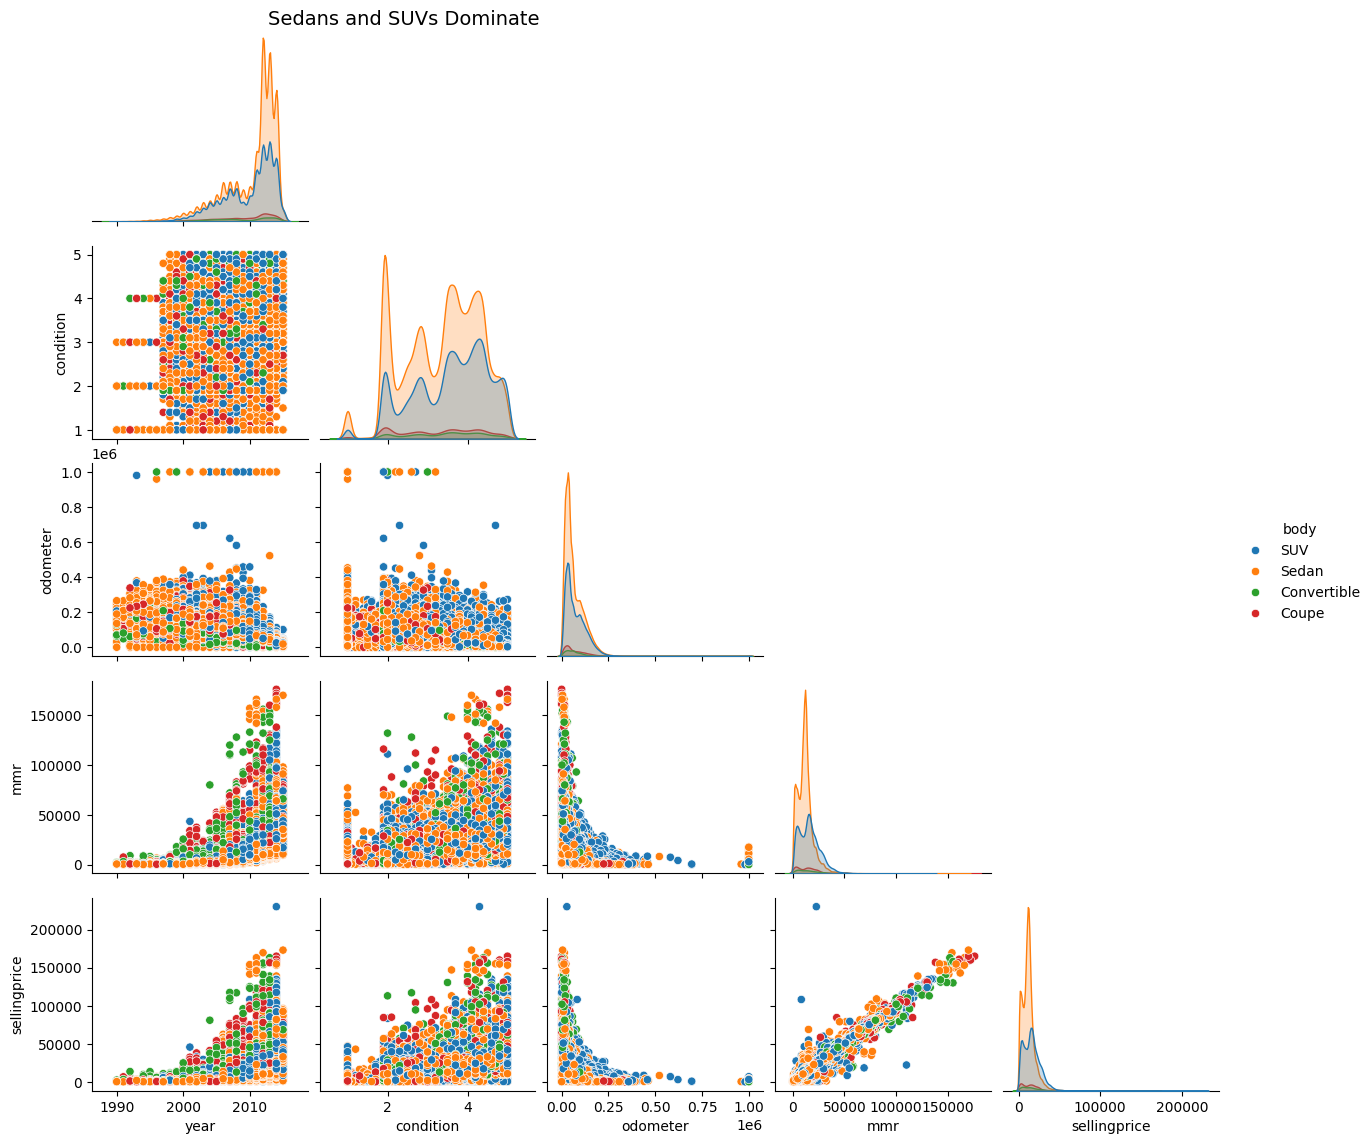

In [85]:
# Filter dataframe down to `body` styles ['SUV', 'Sedan', 'Convertible', and 'Coupe']. Color the scatterplot based on values in the `body` column. 
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]

g = sns.pairplot(
    cars.query('body in @style_list'),
    corner = True,
    hue = 'body'
)

g.fig.suptitle('Sedans and SUVs Dominate', fontsize=14, x=0.3, y=0.915)
g.fig.subplots_adjust(top=0.9)
plt.show()

#### Correlation Heat Map

In [8]:
# Create a correlation matrix.
cars_corr = cars.select_dtypes(include=[np.number]).corr()
cars_corr

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


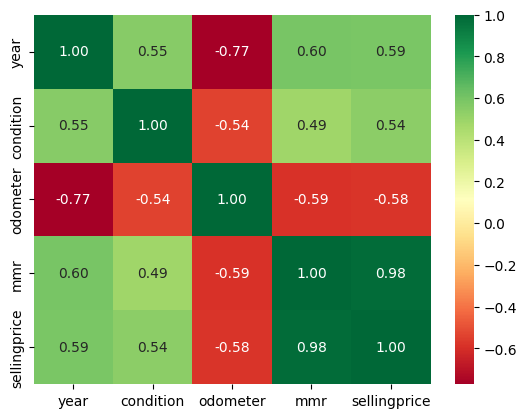

In [11]:
# Create a heatmap with the correlation matrix.
sns.heatmap(
    cars_corr,
    cmap = 'RdYlGn',
    annot = True,
    fmt = '0.2f'
)
plt.show()

* `condition` and `year` have negative correlation with `odometer`. This makes sense. Newer the car and better the condition, it would have lesser `odometer` readings (lesser kms it would have driven) and vice-versa.

#### Value Retention

In [29]:
# Create a data frame with the brands ['Ford', 'BMW', 'Toyota', 'Chevrolet'] filtered.
cars_make = cars.query("make in ['Ford', 'BMW', 'Toyota', 'Chevrolet']")
cars_make.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,3.4,14943.0,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300,17500,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


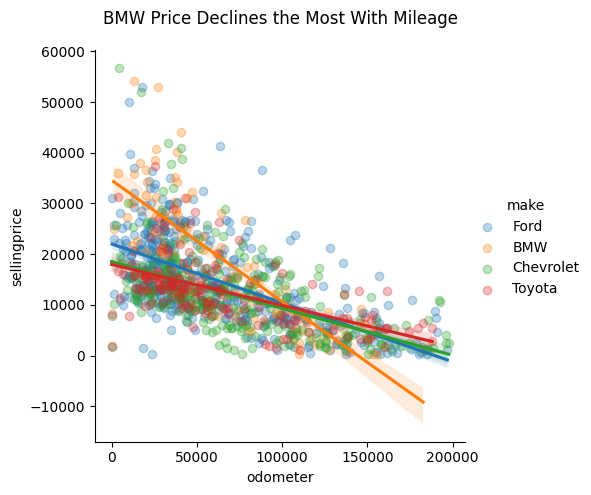

In [72]:
# Create a linear relationship plot between 'odometer' and 'selling price' for each of the 5 brands.
# Filter down appropriately so that the data points are not very crowded.


g = sns.lmplot(
    x = 'odometer',
    y = 'sellingprice',
    hue = 'make',
    scatter_kws = {'alpha': 0.3},
    data=cars_make.query("sellingprice <150000 and odometer < 200000").sample(1000)
)
sns.despine()
g.fig.suptitle('BMW Price Declines the Most With Mileage', fontsize=12)
g.fig.subplots_adjust(top=0.9)

In [52]:
# To get the parameters (slope & intercept) of the regression lines of each brand.
import scipy.stats as stats
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']
cars_regress = cars_make.dropna()

for make in cars_regress['make'].unique():
    filtered_df = cars_regress.loc[cars_regress['make']==make]
    print(f"{make}: {stats.linregress(x=filtered_df['odometer'], y=filtered_df['sellingprice'])[0:2]}")

BMW: (-0.22250330429676318, 35567.97974468479)
Chevrolet: (-0.0884104596277495, 18705.587357485056)
Ford: (-0.09953734771818888, 20840.011075886523)
Toyota: (-0.07594777614361668, 17813.0171076853)


* Toyota loses the least amount of value with mileage whereas BMW loses the most.

# Categorical Variable Relationships

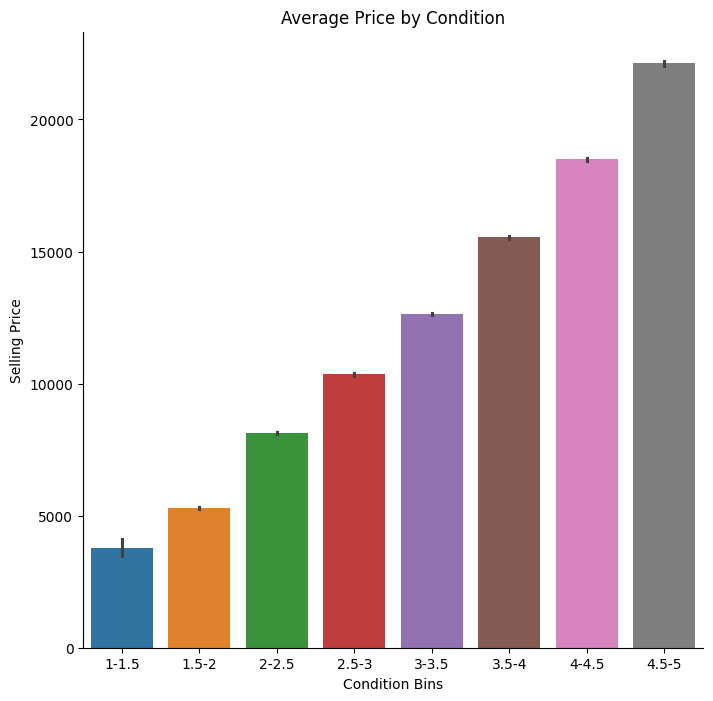

In [137]:
# Add a column 'condition_bins' to assign each row into bins with an increment of 0.5 based on the 'condition' variable.
# Build a bar plot of average price by condition.

bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]
cars = cars.assign(
    condition_bins = pd.cut(cars['condition'], bins = bins, labels = labels)
)

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(
    x = 'condition_bins',
    y = 'sellingprice',
    hue = 'condition_bins',
    legend=None,
    data = cars
)

ax.set_title('Average Price by Condition')
ax.set_xlabel('Condition Bins')
ax.set_ylabel('Selling Price')
sns.despine()

# Price by make and condition

In [124]:
# Find the top 10 most common car brands.
top_10_brands = cars['make'].value_counts().iloc[0:10].index
top_10_brands

Index(['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler'],
      dtype='object', name='make')

In [125]:
# Create a pivot table with the common car brands as rows, condition bins as columns and average selling price as values.

top_10_brands_pivot = cars.query("make in @top_10_brands").pivot_table(
    index = 'make',
    columns = 'condition_bins',
    values = 'sellingprice',
    aggfunc = 'mean'
)
top_10_brands_pivot

condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556
Honda,5418.181818,5013.392857,7924.010577,9179.641598,11618.430007,13724.741442,16415.864917,19317.726330
Hyundai,3089.285714,5124.115218,7283.134792,8600.312323,10312.067568,11704.661821,13483.934264,16502.773497
Kia,4710.000000,4208.728571,6639.857005,8147.949483,10236.522039,11998.424662,13986.038947,16246.605411
Nissan,4592.682927,5509.596553,8431.096744,10016.940794,11893.454024,13056.597333,14654.276116,16105.622175


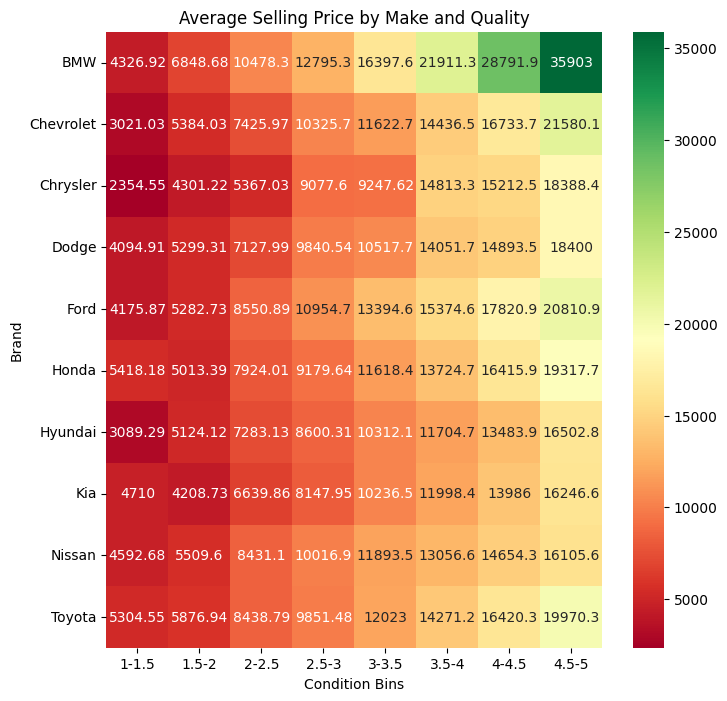

In [126]:
# Build a heat map from the pivot table above.
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(
    top_10_brands_pivot,
    cmap = 'RdYlGn',
    annot = True,
    fmt = 'g'
)

ax.set_title('Average Selling Price by Make and Quality')
ax.set_xlabel('Condition Bins')
ax.set_ylabel('Brand')
plt.show()

* BMW has the highest selling price in its best condition.
* In its lowest condition, BMW sells at a lesser price than Honda, Toyota, Nissan & Kia.
* Chevrolet and Ford have higher selling prices in its best condition.
* American car brands sell trucks and SUVs more; they have a higher selling price than a Sedan. Toyota sells more Sedans than Ford and Chrysler which explains the increased prices of Ford and Chrysler as compared to Toyota.

# Ford F-150 Deep Dive

In [128]:
# Filter your data down to rows where 'model' is 'F-150'.
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5


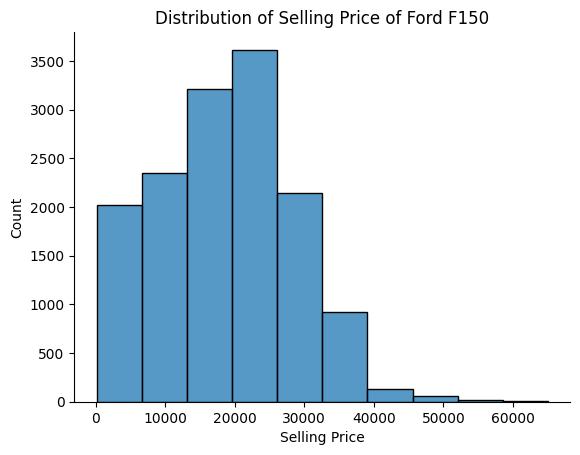

In [133]:
# Build a histogram of sellingprice with 10 bins.
fig, ax = plt.subplots()
sns.histplot(
    f150s['sellingprice'],
    bins = 10
)

ax.set_title('Distribution of Selling Price of Ford F150')
ax.set_xlabel('Selling Price')
sns.despine()
plt.show()

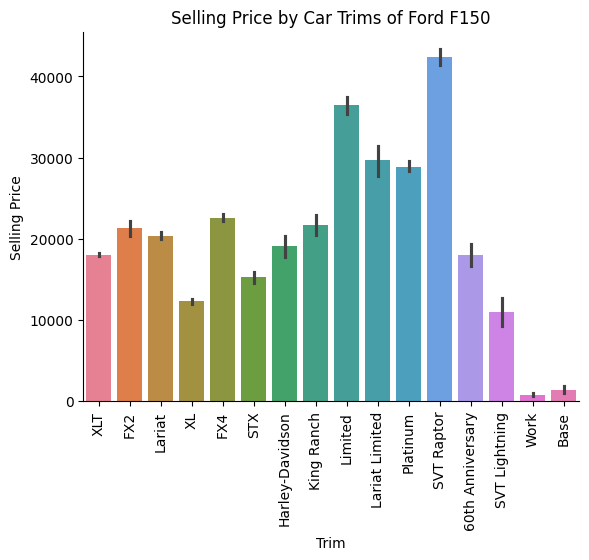

In [143]:
# Build a barplot of `sellingprice` by `trim` for the F150s.
# Car trim refers to a particular version of a model with a particular set of configuration, and is usually designated with a specific moniker.

fig, ax = plt.subplots()
sns.barplot(
    x = 'trim',
    y = 'sellingprice',
    hue = 'trim',
    data = f150s
)

ax.set_title('Selling Price by Car Trims of Ford F150')
ax.set_xlabel('Trim')
ax.set_ylabel('Selling Price')
ax.xaxis.set_tick_params(rotation=90)
sns.despine()

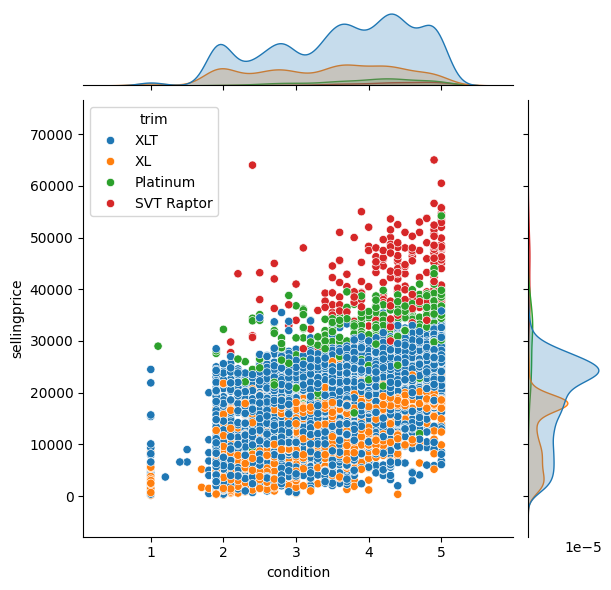

In [146]:
# Filter the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"] (Current available trim models).
# Then, build a jointplot of `condition` (not binned) by `sellingprice`.

trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']
sns.jointplot(
    x = 'condition',
    y = 'sellingprice',
    hue = 'trim',
    data = f150s.query("trim in @trim_list")
)
plt.show()

* XL has the lowest and SVT raptor has the highest selling price across condition bins.

### Are there any "Deals"?

In [193]:
# Create a column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
# Group by color, aggregating by mean of 'diff_to_mmr'.
f150s_by_color = f150s.assign(
     diff_to_mmr = f150s['sellingprice'] - f150s['mmr']
 ).groupby('color').agg({'diff_to_mmr': 'mean'})
f150s_by_color

,diff_to_mmr
color,
beige,-214.674797
black,-197.801359
blue,-278.355427
brown,-301.805054
burgundy,-15.888889
charcoal,-642.857143
gold,-132.840237
gray,-251.475721
green,0.104167


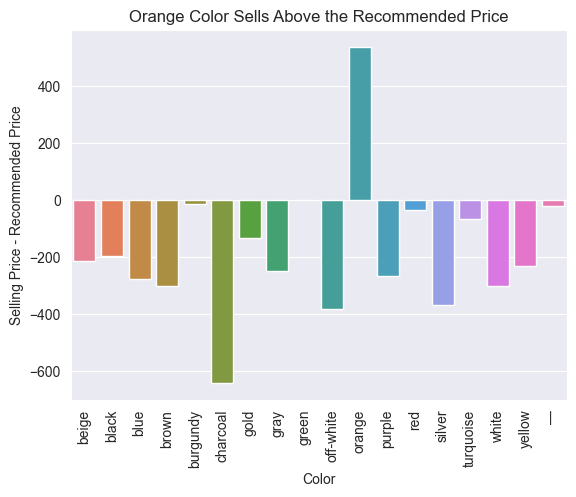

In [177]:
# Build a barplot looking at mean `diff_to_mmr` by `color.
sns.set_style("darkgrid")
fig, ax = plt.subplots()
sns.barplot(
    x = 'color',
    y = 'diff_to_mmr',
    hue = 'color',
    errorbar = None,
    legend = None,
    data = f150s_by_color
)
ax.set_title('Orange Color Sells Above the Recommended Price')
ax.set_xlabel('Color')
ax.set_ylabel('Selling Price - Recommended Price')
ax.xaxis.set_tick_params(rotation=90)

* Orange is the only colour that sells above the recommended retail price. All other colors sell below or at the recommended price.
* Charcoal sells alomost 600 dollars below the recommended price. If color is not a criteria, then going with charcoal color would cost us the least.

In [184]:
# Further filter the data to the trims above. 
# Exclude the color 'orange' and look only at trucks from years between 2009 and 2014.
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']
f150s_reduced = f150s.query("trim in @trim_list and color != 'orange'").loc[f150s['year'].between(2009, 2014)]
f150s_reduced.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1095,2012,Ford,F-150,XL,Regular Cab,NaN,1ftmf1cm6ckd43568,ca,3.5,51851.0,white,gray,aaero sweet company,11950,12800,Thu Dec 18 2014 11:30:00 GMT-0800 (PST),3-3.5
2001,2011,Ford,F-150,XL,SuperCab,automatic,1ftex1em5bfc39949,ca,3.6,91626.0,white,gray,"enterprise fleet management exchange, inc.",14800,13300,Fri Dec 26 2014 15:00:00 GMT-0800 (PST),3.5-4


In [188]:
# Create a pivot table with trim as the index and condition_bins as columns and mean selling price as values.
f150s_pivot = f150s_reduced.pivot_table(
    index = 'trim',
    columns = 'condition_bins',
    values =  'sellingprice',
    aggfunc = 'mean'
)
f150s_pivot

condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
trim,,,,,,,,
Platinum,29000.0,25570.000000,25294.117647,23875.555556,26917.796610,26883.152174,29517.808219,33677.631579
SVT Raptor,NaN,NaN,37583.333333,36392.857143,36546.666667,40131.428571,42566.949153,45947.619048
XL,NaN,8006.250000,12007.770270,12852.358974,15388.942308,16119.674556,17494.629156,18528.623188
XLT,NaN,15420.614035,16820.263158,18762.219828,20110.634328,21281.357759,23204.475831,25061.060065


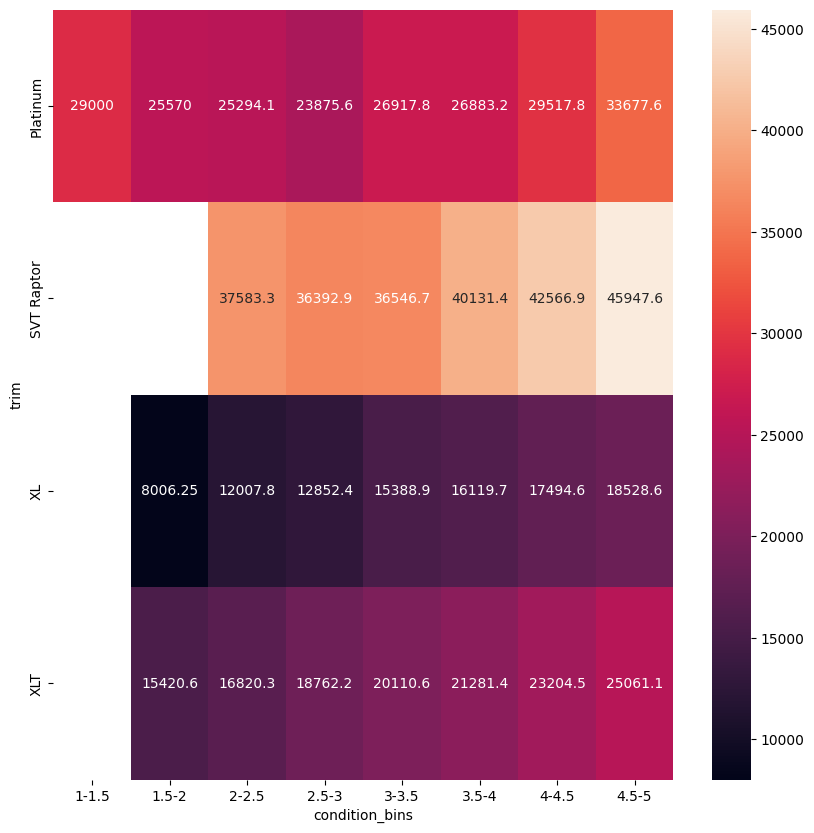

In [197]:
# Create a heat map with the pivot table.
sns.reset_defaults()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(
    f150s_pivot,
    annot = True,
    fmt = 'g'
)
plt.show()

* XL and XLT are the cheapest options available. Let's decide to go ahead with XLT as it has more features than XL but is still quite affordable.

### Best state to buy trucks in?

In [236]:
# Filter out any trucks with a quality less than 3.5 and group them by state, aggregating by mean and count of 'diff_to_mmr'.
f150s_xlr_quality = f150s_reduced.query("condition > 3.5 and trim == 'XLT'").assign(
    diff_to_mmr = f150s_reduced['sellingprice'] - f150s_reduced['mmr']
).groupby('state').agg(
    mean_diff=("diff_to_mmr", 'mean'),
    auto_count=("diff_to_mmr", "count")
)
f150s_xlr_quality.head()

,mean_diff,auto_count
state,,
ab,-3437.755102,49
az,-753.846154,13
ca,955.369128,149
co,542.857143,98
fl,765.813953,215


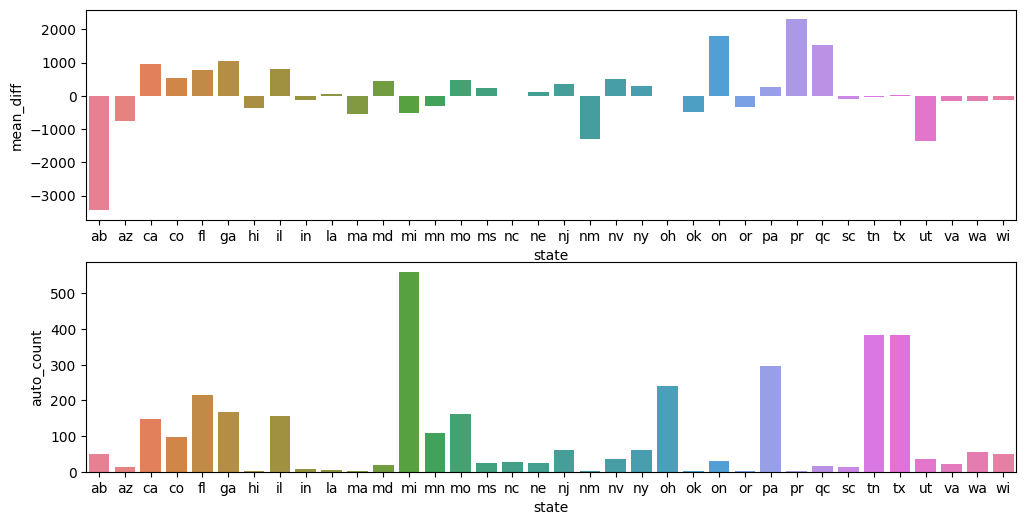

In [237]:
# Build a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` 
# Figure out which states sell XLT models below the recommended price and have ample quantity.

fig, ax = plt.subplots(2, figsize = (12, 6))
sns.barplot(
    x= 'state',
    y = 'mean_diff',
    hue = 'state',
    legend = None,
    data = f150s_xlr_quality,
    ax = ax[0]
)

sns.barplot(
    x= 'state',
    y = 'auto_count',
    hue = 'state',
    legend = None,
    data = f150s_xlr_quality,
    ax = ax[1]
)
plt.show()

* Alberta, Alabama, New Mexico and Utah have selling price significantly lower than recommended price. Out of these Alberta and Utah have good quantity available.

In [234]:
# List the mean and count of 'diff_to_mmr' by 'saledate' in Utah.
f150s.query("trim=='XLT' and state == 'ut' and condition > 3.5").assign(diff_to_mmr = f150s['sellingprice'] - f150s['mmr']).groupby("saledate").agg({"diff_to_mmr":["mean", "count"]})

diff_to_mmr      
                                                mean count
saledate                                                  
Wed Feb 04 2015 03:30:00 GMT-0800 (PST) -1400.000000     2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST) -1605.000000    10
Wed Feb 18 2015 03:30:00 GMT-0800 (PST)  -542.857143     7
Wed Feb 25 2015 03:30:00 GMT-0800 (PST)  -950.000000     4
Wed Jan 07 2015 11:30:00 GMT-0800 (PST) -2325.000000     2
Wed Jan 21 2015 03:30:00 GMT-0800 (PST)  -900.000000     2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT) -2120.000000     5
Wed Mar 04 2015 03:30:00 GMT-0800 (PST)  -600.000000     5

In [235]:
# List the mean and count of 'diff_to_mmr' by 'saledate' in Alberta.
f150s.query("trim=='XLT' and state == 'ab' and condition > 3.5").assign(diff_to_mmr = f150s['sellingprice'] - f150s['mmr']).groupby("saledate").agg({"diff_to_mmr":["mean", "count"]})

diff_to_mmr      
                                                mean count
saledate                                                  
Thu Apr 30 2015 04:30:00 GMT-0700 (PDT) -4150.000000     1
Thu Dec 18 2014 11:30:00 GMT-0800 (PST)    50.000000     1
Thu Feb 05 2015 03:30:00 GMT-0800 (PST)  -466.666667     3
Thu Feb 12 2015 03:30:00 GMT-0800 (PST) -3250.000000     4
Thu Feb 19 2015 03:30:00 GMT-0800 (PST) -3550.000000     1
Thu Feb 19 2015 11:30:00 GMT-0800 (PST) -1775.000000     2
Thu Feb 26 2015 03:30:00 GMT-0800 (PST) -1808.333333     9
Thu Jan 08 2015 11:30:00 GMT-0800 (PST) -4766.666667     3
Thu Jan 15 2015 03:30:00 GMT-0800 (PST) -2975.000000     2
Thu Jan 22 2015 03:30:00 GMT-0800 (PST) -3800.000000     2
Thu Jun 11 2015 04:30:00 GMT-0700 (PDT) -6650.000000     5
Thu Jun 18 2015 04:30:00 GMT-0700 (PDT) -3925.000000     4
Thu Mar 05 2015 03:30:00 GMT-0800 (PST) -2400.000000     5
Thu May 21 2015 04:30:00 GMT-0700 (PDT) -4930.000000     5
Thu May 28 2015 04:30:00 GMT-0700 (PDT) -4100.000000     3
Tue Dec 23 2014 15:30:00 GMT-0800 (PST) -2300.000000     1

### Conclusion
* Ford F-150 with trim model 'XLT' is popular and affordable. It can be procured from Utah or Alberta at a reasonable price.